<a href="https://colab.research.google.com/github/JunpengWen/Assignment1/blob/master/CSI4106_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT 1 - EMPIRICAL STUDY OF KNAPSACK PROBLEM**

**1. Group Description**

Group Number: 53 \\
Member1 Names: Junpeng Wen \\
Member1 Student Numbers: 300249282 \\
Member2 Names: Yongquan Long \\
Member2 Student Numbers: 300249549 \\

**2. Knapsack Problem**

In the Knapsack Problem, a backpack with a limited weight capacity must be filled with items of given weights and values. It is important to maximize the total value without exceeding the weight limit. There are two types of knapsacks: the classic 0/1 Knapsack (entire items) as well as the fractional Knapsack (partial items).

Solving the Knapsack Problem often involves dynamic programming, greedy algorithms, or branch-and-bound techniques, depending on the specific constraints and goals of the problem. It's a classic problem used in algorithm design and optimization and has applications in various fields, including resource allocation, financial portfolio optimization, and more.

**3. Dataset**

A dataset downloaded from Kaggle (https://www.kaggle.com/datasets/warcoder/knapsack-problem?select=knapsack_5_items.csv) presents multiple instances of the Knapsack problem with five items each. There are weights, values, capacities, and optimal selections for each instance. This dataset can be a valuable resource for studying and experimenting with different algorithms and approaches to solving the Problems.

**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np

**Read Dataset**

As outlined in the project description, it should be possible for the correctors to execute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, you can upload it to a public GitHub repository and provide a link to the raw version of the dataset.
GitHub repository：

https://github.com/JunpengWen/Assignment1

The link to the raw version is as follows:

https://raw.githubusercontent.com/JunpengWen/Assignment1/master/knapsack_5_items.csv


Now provide the link to YOUR dataset and read the dataset using pandas:

In [ ]:
url = "https://raw.githubusercontent.com/JunpengWen/Assignment1/master/knapsack_5_items.csv" #provide the link to the raw version of dataset. You *need* to provide a link to *your own* github repository. DO NOT use the link that is provided as an example.

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

As we expected, we have columns for weights, costs, capacity, best picks and best price for all the instances.

Now let's see the first 10 entries (rows):

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**

Typically, the initial step in any project that involves reading and handling data is data preprocessing and cleansing.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of floats or integers, like this: [45, 40, 42, 38, 10]

However, when you read each entry using pandas, they will be in a form of a string: "[45 40 42 38 10]"

So we need to convert these strings into "arrays of floats or integers." You can utilize the function provided below for this purpose:


In [ ]:
def string_to_list(string):
  # Convert a string list into a float list
  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

Now it's time to implement the search algorithms. For each algorithm, a template is provided to you. You can modify this template if you want. But first you should try to go look at all the parameters used, as they are all important. You can also define any number of auxiliary functions you want.


**4. Generate and Test**

Generate and Test is a problem-solving and algorithmic technique in which potential solutions are systematically generated and then tested to ensure they meet the criteria. In this process, all possible solutions must be explored before a suitable solution is found.

In [ ]:
import itertools
def gen_and_test(data):
  # Get the weights, prices, and capacity from the data
  weights = data['Weights']
  prices = data['Prices']
  capacity = data['Capacity']

  # Initialize variables to track the best solution
  best_solution_price = 0
  best_solution = []

  # Iterate from 0 to weights length
  for r in range(len(weights) + 1):
      # Based on the weights of the items, this nested loop generates all combinations of size r.
      for subset in itertools.combinations(enumerate(weights), r):
          # Skip the empty subsets
          if not subset:
              continue

          # subset consists of indices and weights in a tuple
          indices, total_weights = zip(*subset)
          # Calculate the total price of the items in combination
          total_price = sum(prices[i] for i in indices)

          # The best solution should be updated if the total weight is within the capacity and the total price is higher.
          if sum(total_weights) <= capacity and total_price > best_solution_price:
              best_solution_price = total_price
              best_solution = indices

  # return the result
  return best_solution_price, best_solution




In [ ]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)


In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


**Your Analysis:**

Generate and Test is a problem-solving method based on systematically producing potential solutions and comparing them to criteria. Simple and general, it is suitable for a variety of problems due to its simplicity and generality. It can be inefficient for large solution spaces and doesn't guarantee optimal results. There's no directional approach like Greedy Search or Backtracking, which revisits past decisions. It is possible to enhance the Generate and Test method with heuristics or parallel testing in order to make it more efficient. Ideally, it is suited to problems with relatively smaller solution spaces, where generation and testing are straightforward.

------------------------------------------------------------------------------------------------

**5. Greedy Search**

With greedy search, choices are made at each step that are locally optimal with the goal of finding a global optimum. Every time a decision point arises, it chooses the best option without considering future consequences. There is no guarantee that these will be the best possible solutions, especially if the problem requires global knowledge or coordination of choices.

In [ ]:
def greedy(data):
    # Get the weights, prices, and capacity from the data
    weights = data['Weights']
    prices = data['Prices']
    capacity = data['Capacity']

    # Calculating value-to-weight ratio for each item
    ratios = [(i, prices[i]/weights[i]) for i in range(len(weights))]

    # Descending value-to-weight ratio sorting
    sorted_ratios = sorted(ratios, key=lambda x: x[1], reverse=True)

    # Initialize variables to track the best solution
    best_solution_price = 0
    best_solution = []

    # Filling number for the knapsack
    for i, ratio in sorted_ratios:
        if weights[i] <= capacity:  # Verify that the item fits within the remaining capacity
            best_solution.append(i)  # Add the item to the solution
            best_solution_price += prices[i]  # Add the item's value to the total value
            capacity -= weights[i]  # Reduce the remaining capacity

    return best_solution_price, best_solution


In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)


In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8341937443061038


**Your Analysis:**

The Greedy Search algorithm has shown an impressive 83.4% accuracy rate. It shows how greedy approaches work when quick approximate solutions are more valuable than exact ones. For problems where there is a local optimum and a global optimum, this strategy is highly effective. Despite greedy methods sometimes getting better results, heuristics can keep them from achieving global optimality.To determine if the Greedy approach is appropriate, it's crucial to analyze the problem structure. As a result, Greedy algorithm may provide fast solutions for some problems, but it's not always the best strategy.



------------------------------------------------------------------------------------------------

**6. Simulated Annealing**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.


In [ ]:
import random
import math

def simulated_annealing(data, N, initial_temperature, cooling_rate, min_temperature=0.001):
  # Get the weights, prices, and capacity from the data
  weights = data['Weights']
  prices = data['Prices']
  capacity = data['Capacity']

  # Create a random initial solution for each item include or not include then compute the value
  current_solution = [random.choice([0, 1]) for _ in range(len(weights))]
  current_value = sum(item[0] * item[1] for item in zip(current_solution, prices))

  # Initialize variables to track the best solution
  best_solution = current_solution[:]
  best_value = current_value
  current_temperature = initial_temperature
  iteration = 0

 # Iterations at the temperature N times if current temperature is greater than minimum
  while current_temperature > min_temperature:
      for _ in range(N):
          iteration += 1

          # Flip one random bit in the current solution to create a neighbouring solution.
          neighbour = current_solution[:]
          flip_index = random.randint(0, len(weights) - 1)
          neighbour[flip_index] = 1 - neighbour[flip_index]

          # Check if the new solution's weight exceeds the knapsack's capacity.
          total_weight = sum(item[0] * item[1] for item in zip(neighbour, weights))
          if total_weight > capacity:
              continue

          # Calculate the value of the neighbour
          neighbour_value = sum(item[0] * item[1] for item in zip(neighbour, prices))

          # To determine if moving to a neighbouring solution is acceptable.
          delta = neighbour_value - current_value
          if delta > 0 or random.uniform(0, 1) < math.exp(delta / current_temperature):
              current_solution = neighbour
              current_value = neighbour_value

              # Update best solution
              if current_value > best_value:
                  best_solution = current_solution[:]
                  best_value = current_value

      # Cooling the temperature each iterate
      current_temperature *= cooling_rate

      # Reheating if algorithm stagnates after 100 try
      if iteration % 100 == 0 and current_value < best_value:
          current_temperature *= 1.2

  return best_value, best_solution



In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 8, initial_temperature=1, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.2749266120052637


**Your Analysis:**

Simulated Annealing (SA) is a probabilistic technique inspired by metallurgy annealing. As the algorithm progresses, it uses a metaphorical temperature to determine whether it will accept worse solutions. Based on the provided data, SA has an accuracy of approximately 27.49%. SA's performance can be significantly influenced by factors like the initial temperature and cooling rate. When the initial temperature is high, excessive randomness can result, and if the cooling rate is rapid, thorough exploration might not be possible before convergence. The termination criteria, or when the algorithm is terminated, can also be a factor. SA may fail to converge to the optimal solution if the settings are incorrect or the problem is particularly complex.

------------------------------------------------------------------------------------------------

**7. Genetic Algorithm**

Genetic algorithms emulate the process of natural selection as a subset of evolutionary algorithms. By generating a population of potential solutions to a problem, GAs refine these candidates iteratively. Every generation, each solution in the population is evaluated for fitness. After selecting the best-performing solutions, the "fittest" are reproduced.

In [ ]:
import random

def calculate_fitness(ind, prices, weights, capacity):
  total_weight = sum(item[0] * item[1] for item in zip(ind, weights))
  total_price = sum(item[0] * item[1] for item in zip(ind, prices))

  # check the solutions are exceed the capacity or not
  if total_weight > capacity:
      return 0
  return total_price

def crossover(parent1, parent2, cross_rate):
  # performs the crossover operation based on the cross rate probability
  if random.random() < cross_rate:
      # Genes are exchanged and pass between two children at a random select point
      point = random.randint(1, len(parent1) - 2)
      child1 = parent1[:point] + parent2[point:]
      child2 = parent2[:point] + parent1[point:]
      return child1, child2
  return parent1[:], parent2[:]

def mutation(child, mut_rate):
  # It flips the bit for each gene based on its mutation rate
  for i in range(len(child)):
      if random.random() < mut_rate:
          child[i] = 1 - child[i]  # Flip the bit
  return child

def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):
  # Get the weights, prices, and capacity from the data
  weights = data['Weights']
  prices = data['Prices']
  capacity = data['Capacity']

  # Generate the initial population randomly
  population = [[random.choice([0, 1]) for _ in range(len(weights))] for _ in range(population_size)]

  for generation in range(num_generations):
      # Sort populations based on their fitness
      population.sort(key=lambda ind: -calculate_fitness(ind, prices, weights, capacity))
      new_population = population[:2]  # Keep the best 2 solutions

      # If the new population is smaller than the population size, the tournament selection will not end
      while len(new_population) < population_size:
          # Pick people randomly from the population that fit the tournament size then sort
          tournament = random.sample(population, tournament_size)
          tournament.sort(key=lambda ind: -calculate_fitness(ind, prices, weights, capacity))


          parent1, parent2 = tournament[:2]
          # Crossover function and mutation function are called
          child1, child2 = crossover(parent1, parent2, cross_rate)
          child1 = mutation(child1, mut_rate)
          child2 = mutation(child2, mut_rate)

          new_population.extend([child1, child2])

      population = new_population

  best_solution = max(population, key=lambda ind: calculate_fitness(ind, prices, weights, capacity))
  best_solution_price = calculate_fitness(best_solution, prices, weights, capacity)

  return best_solution_price, best_solution

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 40, num_generations = 40, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)


In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

**Your Analysis:**

The Genetic Algorithm (GA) displayed an impressive accuracy of 0.9996, demonstrating its ability to optimize. They are known for their ability to search large, complex spaces effectively, and their performance here confirms this. Through successive generations of selection, crossover, and mutation, GAs gradually narrow down the solution space to the most promising regions. Having an accuracy approaching 1 indicates that the algorithm exploited high-fitness areas while maintaining enough diversity to avoid local optimum. When interpreting this performance, factors such as population size, crossover rate, and mutation rate play a crucial role in the GA's adaptability. To conclude, the Genetic Algorithm has provided an almost optimal solution to the given problem instance and configuration, demonstrating its potential as a powerful heuristic optimization tool.

------------------------------------------------------------------------------------------------

**8. Comparative Study**


In summary Greedy Search achieved an accuracy of 0.8342 with a runtime of 0.739 seconds. Simulated Annealing achieved an accuracy of 0.2838 with a runtime of 55.737 seconds. Genetic Algorithm achieved an impressive accuracy of 0.9997 with a runtime of 404.33 seconds.

These results highlight the varying trade-offs between accuracy and computational time among the three algorithms, with Genetic Algorithm performing exceptionally well in terms of accuracy but requiring significantly more time compared to the other two methods.

Here we draw a table showing the Accuracy and the running time of these algorithms:

In [ ]:
from tabulate import tabulate

# Data
data = [
    ["Greedy Search", 0.8341937443061038, "0.739s"],
    ["Simulated Annealing", 0.28383439619394674, "55.737s"],
    ["Genetic Algorithm", 0.9996963255390222, "404.33s"]
]

# Table headers
headers = ["Algorithm", "Accuracy", "Run Time"]

# Create and print the table
table = tabulate(data, headers, tablefmt="grid")

print(table)

+---------------------+------------+------------+
| Algorithm           |   Accuracy | Run Time   |
+=====================+============+============+
| Greedy Search       |   0.834194 | 0.739s     |
+---------------------+------------+------------+
| Simulated Annealing |   0.283834 | 55.737s    |
+---------------------+------------+------------+
| Genetic Algorithm   |   0.999696 | 404.33s    |
+---------------------+------------+------------+


We can also show the Column chart that showing the Accuracy Comparison and Runtime Comparison. This code will generate a grouped column chart that visually compares the accuracy and runtime of Greedy Search, Simulated Annealing, and Genetic Algorithm. The left y-axis represents accuracy, while the right y-axis represents runtime. This format allows for a clear comparison between the two metrics for each algorithm.

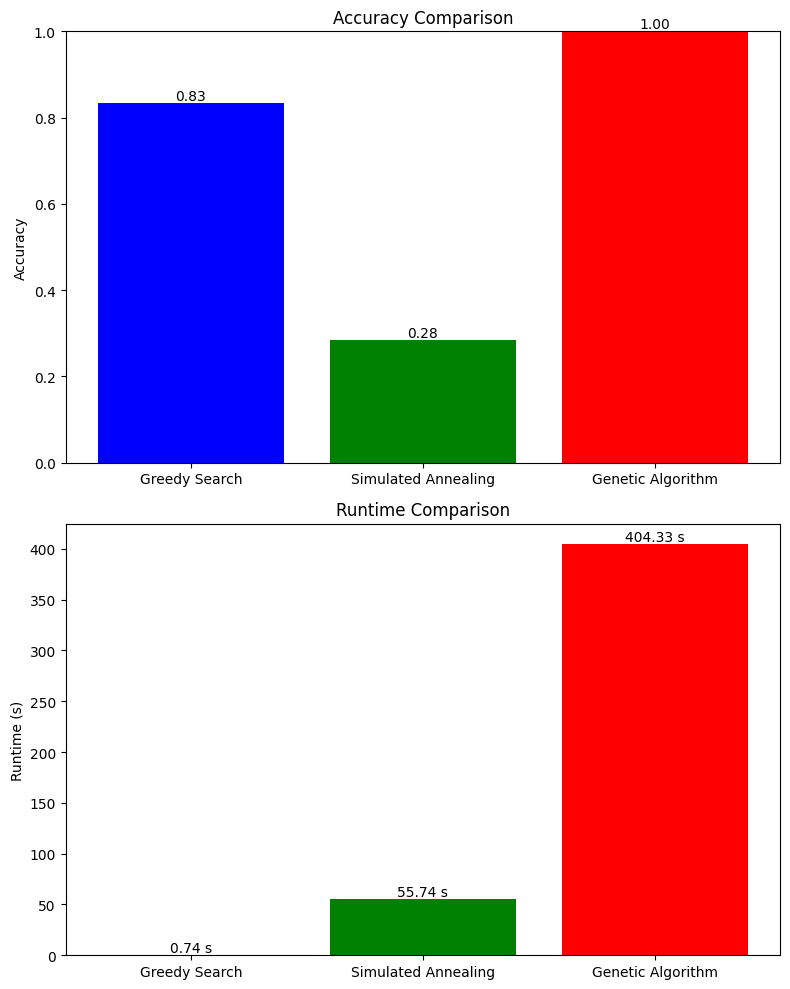

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ["Greedy Search", "Simulated Annealing", "Genetic Algorithm"]

# Accuracy values
accuracy = [0.8341937443061038, 0.28383439619394674, 0.9996963255390222]

# Runtime values in seconds
runtime = [0.739, 55.737, 404.33]

# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot accuracy in the first subplot
axs[0].bar(algorithms, accuracy, color=['blue', 'green', 'red'])
axs[0].set_title('Accuracy Comparison')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0, 1)  # Set the y-axis limits for accuracy

# Plot runtime in the second subplot
axs[1].bar(algorithms, runtime, color=['blue', 'green', 'red'])
axs[1].set_title('Runtime Comparison')
axs[1].set_ylabel('Runtime (s)')

# Add labels to the bars
for i in range(len(algorithms)):
    axs[0].text(i, accuracy[i], f"{accuracy[i]:.2f}", ha='center', va='bottom')
    axs[1].text(i, runtime[i], f"{runtime[i]:.2f} s", ha='center', va='bottom')

# Show the chart
plt.tight_layout()
plt.show()

**We set the index of the algorithm to several Tests and ran them separately and calculated their accuracy.**

Test 1
For Simulated Annealing:
When N = 2, initial_temperature=1, cooling_rate=0.95, Simulated Annealing Accuracy is 0.24192732057900598
For Genetic Algorithm:
When population_size = 10, num_generations = 10, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5, Genetic Algorithm Accuracy is 0.812227958295374

Test 2
For Simulated Annealing:
When N = 4, initial_temperature=1, cooling_rate=0.95, Simulated Annealing Accuracy is 0.25893309039376455
For Genetic Algorithm:
When population_size = 20, num_generations = 20, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5, Genetic Algorithm Accuracy is 0.9815770827006782

Test3
For Simulated Annealing:
When N = 6, initial_temperature=1, cooling_rate=0.95, Simulated Annealing Accuracy is 0.26601882781658065
For Genetic Algorithm:
When population_size = 30, num_generations = 30, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5, Genetic Algorithm Accuracy is 0.9969632553902217

Test4
For Simulated Annealing:
When N = 8, initial_temperature=1, cooling_rate=0.95, Simulated Annealing Accuracy is 0.2783682558963458
For Genetic Algorithm:
When population_size = 40, num_generations = 40, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5, Genetic Algorithm Accuracy is 0.9986840773357627

Test5
For Simulated Annealing:
When N = 10, initial_temperature=1, cooling_rate=0.95,  Simulated Annealing Accuracy is 0.28383439619394674
For Genetic Algorithm:
When population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5,  Genetic Algorithm Accuracy is 0.9996963255390222

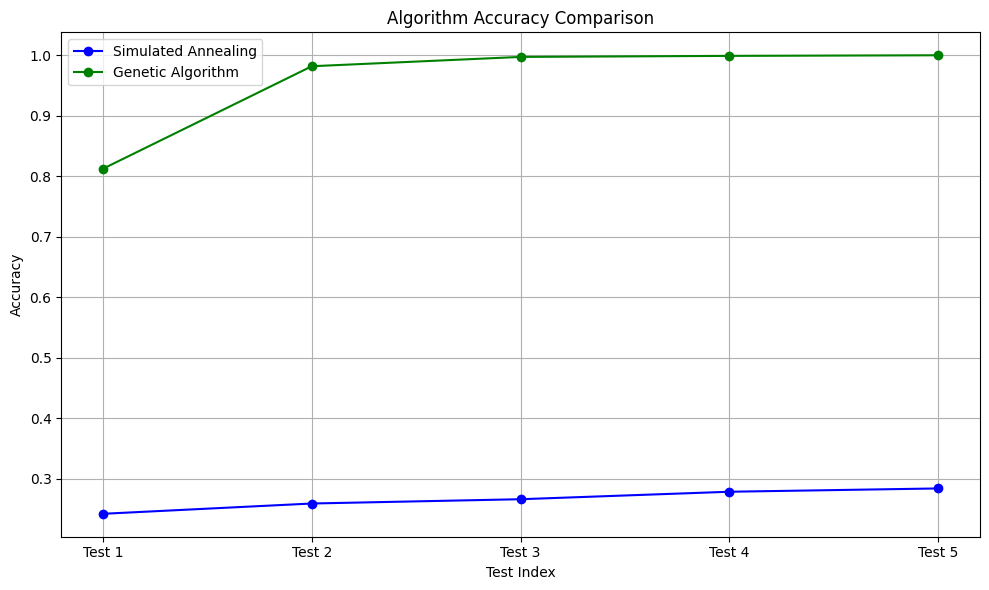

In [ ]:
import matplotlib.pyplot as plt

# Test data
tests = ["Test 1", "Test 2", "Test 3", "Test 4", "Test 5"]

# Simulated Annealing accuracy data
sa_accuracy = [0.24192732057900598, 0.25893309039376455, 0.26601882781658065, 0.2783682558963458, 0.28383439619394674]

# Genetic Algorithm accuracy data
ga_accuracy = [0.812227958295374, 0.9815770827006782, 0.9969632553902217, 0.9986840773357627, 0.9996963255390222]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(tests, sa_accuracy, marker='o', linestyle='-', color='b', label='Simulated Annealing')
plt.plot(tests, ga_accuracy, marker='o', linestyle='-', color='g', label='Genetic Algorithm')

# Customize the chart
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Test Index')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the chart
plt.tight_layout()
plt.show()



--------------------------------------------------------------------------


**9. Conclusion**

The empirical analysis carried out in this study compared the performance metrics of three prominent algorithms: Greedy Search, Simulated Annealing, and the Genetic Algorithm. Each algorithm, with its unique approach to problem-solving, presented varying outcomes in terms of accuracy and computational time.

Greedy Search, known for its quick decision-making, finished its run in an impressive 0.739 seconds. However, its accuracy reading of 0.8342 brings to the forefront a pertinent question about the trade-offs involved: Does the quickness of the Greedy approach potentially compromise the depth or quality of the solution?

Simulated Annealing, on the other hand, took a relatively longer 55.73 seconds, achieving an accuracy of 0.2749. This reflects its inherent methodology of exploring various solution spaces, but the accuracy suggests there might be room for further optimization or parameter tuning.

The Genetic Algorithm emerged as a notable contender. While it required a substantial computational time of 404.33 seconds, its accuracy rate stood at an exemplary 0.9996. This suggests that for problems demanding high precision, and where time is a secondary concern, Genetic Algorithm might be the best fit.

These observations emphasize a recurring theme in computational problem solving: the balance between speed and accuracy. There isn't a one-size-fits-all solution, and the choice of algorithm will often hinge on the specific requirements of the task at hand.

Looking ahead, there's a promising avenue in the development of hybrid algorithms. By synergizing the strengths of these algorithms, we might arrive at solutions that are both time-efficient and highly accurate. Moreover, broadening the scope of such studies to encompass a diverse range of problems and scales will pave the way for a more holistic, generalized framework for algorithm selection and application.

--------------------------------------------------------------------------


**10 References**

[1] “Knapsack problem using simulated annealing example,” James D. McCaffrey, https://jamesmccaffrey.wordpress.com/2021/12/17/knapsack-problem-using-simulated-annealing-example/ (accessed Oct. 2, 2023).

[2] “Genetic algorithms explained by example,” YouTube, https://www.youtube.com/watch?v=uQj5UNhCPuo&amp;t=1s (accessed Oct. 2, 2023).

[3] “Genetic algorithms,” GeeksforGeeks, https://www.geeksforgeeks.org/genetic-algorithms/ (accessed Oct. 1, 2023).

[4] J. Brownlee, “Simulated annealing from scratch in Python,” MachineLearningMastery.com, https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/ (accessed Oct. 1, 2023).

[5] “Greedy algorithm,” Programiz, https://www.programiz.com/dsa/greedy-algorithm (accessed Oct. 1, 2023).

[6] R. K. Ahuja, J. B. Orlin, and A. Tiwari, “A greedy genetic algorithm for the quadratic assignment problem,” Computers &amp;amp; Operations Research, vol. 27, no. 10, pp. 917–934, 2000. doi:10.1016/s0305-0548(99)00067-2

**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".